In [ ]:
import cv2
import torch
import torchvision.transforms as T
import torchvision

# Load model
model = torchvision.models.segmentation.deeplabv3_resnet101(weights="DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1")
model.eval()

# Load and preprocess your image
img = cv2.imread("./images/1732876035469011765.png")
print(img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])
input_tensor = transform(img_rgb).unsqueeze(0)

# Inference
with torch.no_grad():
    output = model(input_tensor)['out']
pred = output.argmax(1).squeeze().cpu().numpy()

# Visualize (simple grayscale)
cv2.imwrite("segmentation_prediction.png", pred * 10)
# Multiply to make differences visible
cv2.imshow("Segmentation", pred * 10)


[[[ 74 144 247]
  [ 74 144 247]
  [ 70 130 247]
  ...
  [141 255 255]
  [138 255 255]
  [138 255 255]]

 [[ 74 144 247]
  [ 74 144 247]
  [ 70 130 247]
  ...
  [141 255 255]
  [138 255 255]
  [138 255 255]]

 [[ 77 137 246]
  [ 77 137 246]
  [ 70 131 238]
  ...
  [136 255 255]
  [135 255 255]
  [135 255 255]]

 ...

 [[ 34  47  53]
  [ 34  47  53]
  [ 35  45  51]
  ...
  [ 36  42  41]
  [ 37  40  42]
  [ 37  40  42]]

 [[ 37  46  51]
  [ 37  46  51]
  [ 36  47  50]
  ...
  [ 36  45  44]
  [ 37  41  46]
  [ 37  41  46]]

 [[ 37  46  51]
  [ 37  46  51]
  [ 36  47  50]
  ...
  [ 36  45  44]
  [ 37  41  46]
  [ 37  41  46]]]


error: OpenCV(4.10.0) D:/a/opencv-python/opencv-python/opencv/modules/highgui/src/precomp.hpp:156: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


: 

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load pre-trained DeepLabV3+ model from TF Hub (Cityscapes version)
model = hub.load("https://tfhub.dev/google/deeplabv3-cityscapes/1")

# Preprocess image
img = cv2.imread("./images/1732876035469011765.png")
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = tf.image.resize(img, (513, 513))
img_normalized = tf.cast(img_resized, tf.float32) / 127.5 - 1  # Normalize to [-1, 1]
img_batch = tf.expand_dims(img_normalized, 0)

# Inference
result = model(img_batch)
segmentation_map = tf.argmax(result['default'], axis=-1)
segmentation_map = tf.squeeze(segmentation_map)

# Visualize
plt.imshow(segmentation_map)
plt.show()


OSError: https://tfhub.dev/google/deeplabv3-cityscapes/1 does not appear to be a valid module.

In [14]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the Cityscapes-trained DeepLabV3+ model from TF Hub
model_url = "https://tfhub.dev/tensorflow/deeplabv3/1"  # Default is trained on Cityscapes
model = hub.load(model_url)

def preprocess_image(image_path, target_size=(512, 1024)):
    """Load and preprocess the image for DeepLabV3."""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")
    
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize (Cityscapes model expects 1024x512 by default)
    img_resized = tf.image.resize(img, target_size)
    
    # Normalize to [-1, 1]
    img_normalized = tf.cast(img_resized, tf.float32) / 127.5 - 1
    
    # Add batch dimension
    img_batch = tf.expand_dims(img_normalized, 0)
    
    return img_batch, img

def decode_segmentation_map(seg_map, road_class_id=0):
    """Extract road class from segmentation map."""
    # Cityscapes class IDs: road=0, sidewalk=1, etc.
    road_mask = (seg_map == road_class_id).astype(np.uint8) * 255  # White for road
    return road_mask

# Path to your image
image_path = "./images/1732876035469011765.png"

# Preprocess image (Cityscapes model expects 1024x512)
img_batch, original_img = preprocess_image(image_path, (512, 1024))

# Run inference
result = model(img_batch)
segmentation_map = tf.argmax(result['default'], axis=-1)
segmentation_map = tf.squeeze(segmentation_map).numpy()

# Extract only the road class (class 0 in Cityscapes)
road_mask = decode_segmentation_map(segmentation_map, road_class_id=0)

OSError: https://tfhub.dev/tensorflow/deeplabv3/1 does not appear to be a valid module.

In [13]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
from pyntcloud import PyntCloud


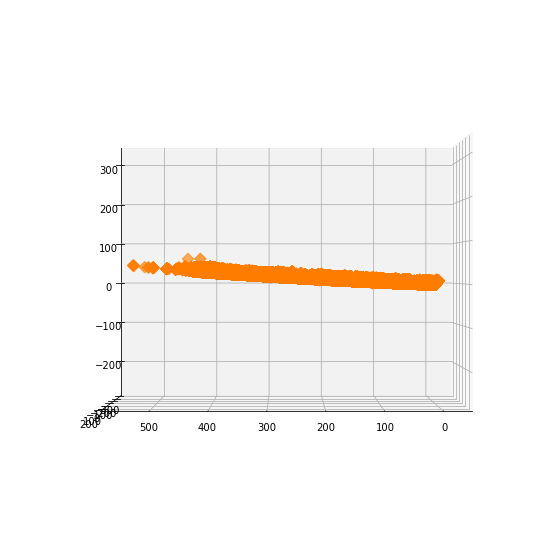

In [3]:
cloud = PyntCloud.from_file("./scans.pcd")
cloud.plot()


In [4]:
import pandas as pd
df = cloud.points

# Show the first 5 rows (like CSV preview)
print(df.head(50))
print(df.columns)
print(df.shape)
print(df.columns)

filtered = df[
    (df["x"] == -1.983784) &
    (df["y"] == 5.048285) &
    (df["z"] == -0.031545)]

# Print result
print(filtered)

           x         y         z  intensity  normal_x  normal_y  normal_z  \
0  -1.983784  5.048285 -0.031545       28.0       0.0       0.0       0.0   
1  -1.959925  5.034010  2.158163       76.0       0.0       0.0       0.0   
2  -1.956028  5.024359  2.018509      108.0       0.0       0.0       0.0   
3  -1.957771  5.024389  1.880711      143.0       0.0       0.0       0.0   
4  -1.963642  5.033169  1.745614      169.0       0.0       0.0       0.0   
5  -1.962481  5.031589  1.606385      104.0       0.0       0.0       0.0   
6  -1.976475  5.055270  1.473153      159.0       0.0       0.0       0.0   
7  -1.959929  5.021130  1.328690       97.0       0.0       0.0       0.0   
8  -1.973894  5.051620  1.198619      102.0       0.0       0.0       0.0   
9  -1.971724  5.043337  1.057884      110.0       0.0       0.0       0.0   
10 -1.970121  5.038555  0.919227      171.0       0.0       0.0       0.0   
11 -1.968776  5.032056  0.781626       79.0       0.0       0.0       0.0   

In [19]:
df_2=pd.read_csv("./traj.txt", sep=" ", header=None)
print(df_2.shape)

(1216, 8)
